<a href="https://colab.research.google.com/github/GalynaDe/ML/blob/main/HW_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [6]:
df = pd.read_csv('drive/MyDrive/ML course 2024/HW 3.1/marketing_campaign.csv', sep='\t')

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
df.describe().round(0)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.0,2240.0,2216.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0
mean,5592.0,1969.0,52247.0,0.0,1.0,49.0,304.0,26.0,167.0,38.0,27.0,44.0,2.0,4.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
std,3247.0,12.0,25173.0,1.0,1.0,29.0,337.0,40.0,226.0,55.0,41.0,52.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,1893.0,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
25%,2828.0,1959.0,35303.0,0.0,0.0,24.0,24.0,1.0,16.0,3.0,1.0,9.0,1.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
50%,5458.0,1970.0,51382.0,0.0,0.0,49.0,174.0,8.0,67.0,12.0,8.0,24.0,2.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
75%,8428.0,1977.0,68522.0,1.0,1.0,74.0,504.0,33.0,232.0,50.0,33.0,56.0,3.0,6.0,4.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
max,11191.0,1996.0,666666.0,2.0,2.0,99.0,1493.0,199.0,1725.0,259.0,263.0,362.0,15.0,27.0,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,11.0,1.0


**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [15]:
# Fill in as -1 to ensure these values stand out significantly from the rest during interpretation.
# After initial experiments, changes can be considered.
# Separately store the locations where the data has been filled in a dedicated column.

df['Income_not_filled'] = df.Income.isna()
df.Income = df.Income.fillna(-1)

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

Calculating the number of days we’ve had the client and their age in years. Since this is a historical dataset, I consider the maximum date in the dataset

In [18]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')
df.Dt_Customer.max()

Timestamp('2014-06-29 00:00:00')

In [19]:
today = df.Dt_Customer.max()
df['days_lifetime'] = (today - df.Dt_Customer).dt.days

In [20]:
df['years_customer'] = df.Year_Birth.apply(lambda x: today.year - x)

In [21]:
df.Education.value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [23]:
#OneHotEncoding
df_education = pd.get_dummies(df.Education, prefix='education').astype(int)
df = pd.concat([df, df_education], axis=1)

In [24]:
df.Marital_Status.value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [26]:
#Categorical data processing
marital_status_map ={'Alone': 'Single', 'Absurd':' Else', 'YOLO': 'Else'}
df['Marital_Status_clean'] = df.Marital_Status.map(marital_status_map)

In [27]:
df_ms = pd.get_dummies(df.Marital_Status_clean, prefix='marital').astype(int)
df = pd.concat([df, df_ms], axis=1)

In [28]:
X = df.drop(['ID', 'Dt_Customer', 'Education', 'Marital_Status', 'Marital_Status_clean'], axis=1)

**Завдання 4.**

Запишіть в змінну X ті дані, які будете кластеризувати.
Побудуйте кластеризацію з KMeans на 3 кластери.
Обчисліть метрику силуету для цієї кластеризації.

In [89]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[0 0 2 ... 0 2 0]


In [90]:
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.53


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати plotly.express.scatter_3d для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [91]:
result = X.copy()
result['3_clust_kmeans'] = labels

<Axes: ylabel='3_clust_kmeans'>

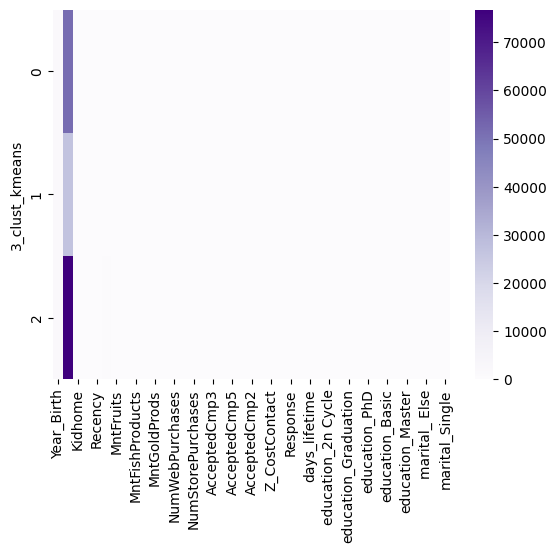

In [92]:
sns.heatmap(result.groupby(['3_clust_kmeans']).mean(), cmap="Purples")

In [93]:
px.scatter_3d(X, x='Income', y='Recency',z='NumStorePurchases', color=labels)

Кластери переважно сформувалися за рахунок доходу, оскільки є викид, а ця колонка має найбільший масштаб. Метрика силуету показує хороший результат через те, що один кластер із викидом чітко відокремився.

Помічаємо викид у значенні Income. Замінюємо його на таке ж значення, як для пропущених даних.

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [94]:
def build_vizualize_evaluate_clustering(X, sklearn_clustering):
  clustering = sklearn_clustering(n_clusters=3, n_init='auto')
  clustering.fit(X)

  labels = clustering.predict(X)
  s = metrics.silhouette_score(X, labels, metric='euclidean')
  print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')
  fig = px.scatter_3d(X, x='Income', y='Recency', z='NumStorePurchases', color=labels)
  fig.show()
  return labels

In [95]:
scaled_X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
labels = build_vizualize_evaluate_clustering(scaled_X, KMeans)

Silhouette Coefficient for the data Dataset Clusters: 0.37


Виглядає так, що цього разу дані кластеризувались по іншим характеристикам.

In [96]:
result_scaled = scaled_X.copy()

<Axes: ylabel='3_clust_kmeans'>

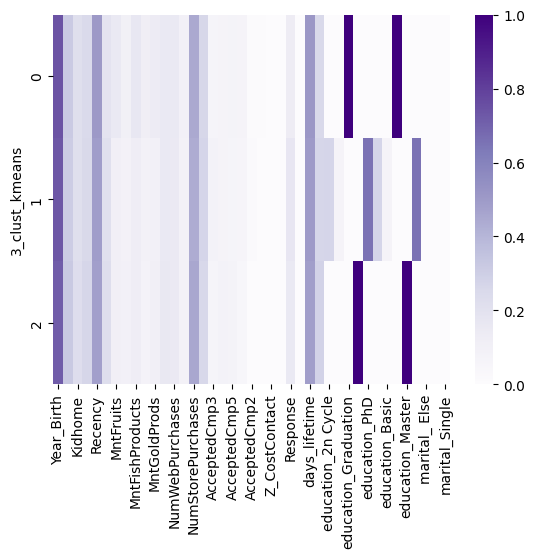

In [105]:
result_scaled['3_clust_kmeans'] = labels
sns.heatmap(result_scaled.groupby(['3_clust_kmeans']).mean(), cmap="Purples")

In [109]:
px.scatter_3d(X, x='Income', y='days_lifetime', z='NumStorePurchases', color=labels)

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [69]:
df.Income.max()

666666.0

In [70]:
df.Income = df.Income.replace(666666.0, -1)
X.Income = X.Income.replace(666666.0, -1)

In [71]:
scaled_X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

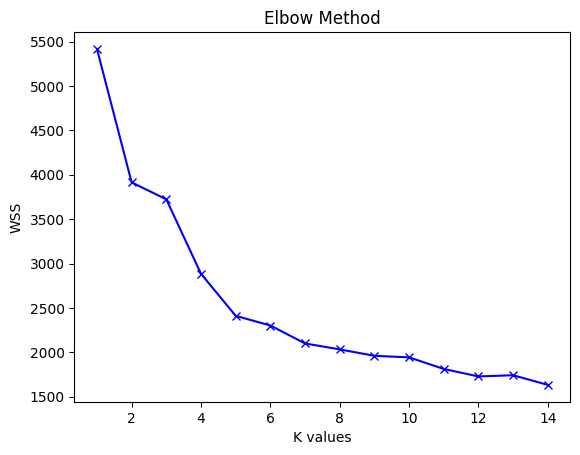

In [74]:
K = range(1, 15)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(scaled_X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('WSS')
plt.title('Elbow Method')
plt.show()

In [75]:
kmeans = KMeans(n_clusters=8, n_init='auto')
kmeans.fit(scaled_X)

labels = kmeans.predict(scaled_X)

<Axes: ylabel='8_clust_kmeans'>

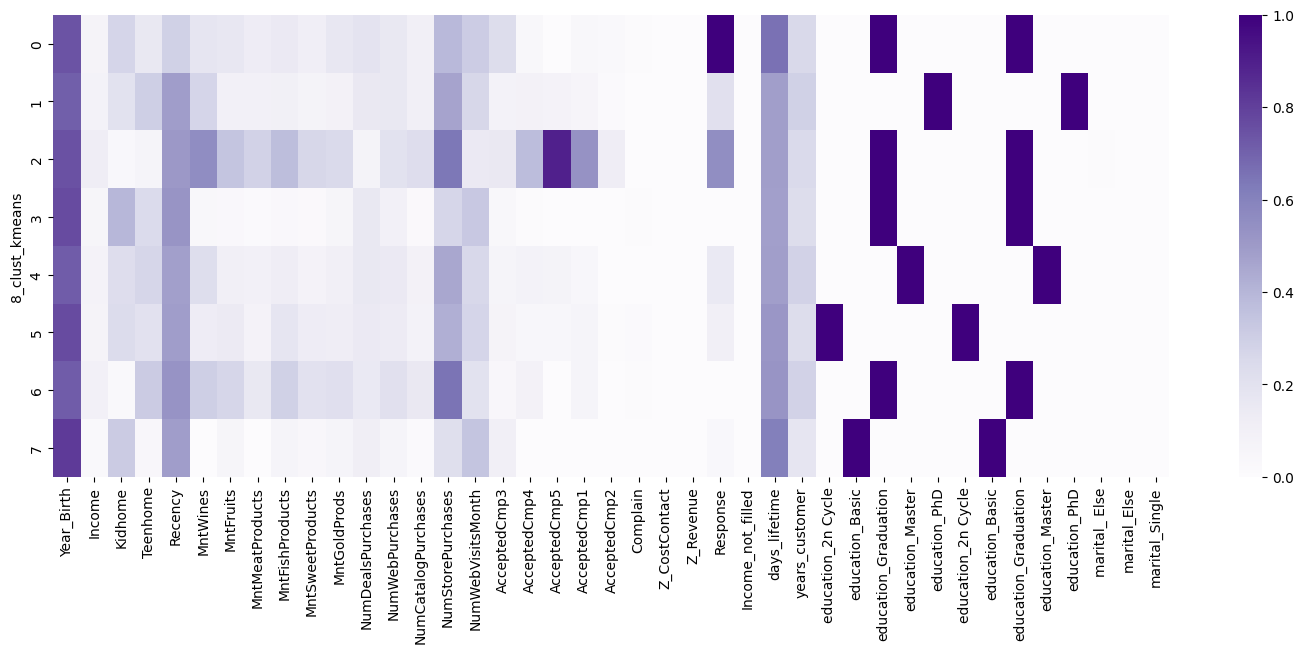

In [76]:
result_scaled['8_clust_kmeans'] = labels
plt.figure(figsize=(18,6))
sns.heatmap(result_scaled.groupby(['8_clust_kmeans']).mean(), cmap="Purples")

In [77]:
px.scatter_3d(scaled_X, x='MntWines', y='Response',z='NumStorePurchases', color=labels)

In [78]:
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: -0.24


**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

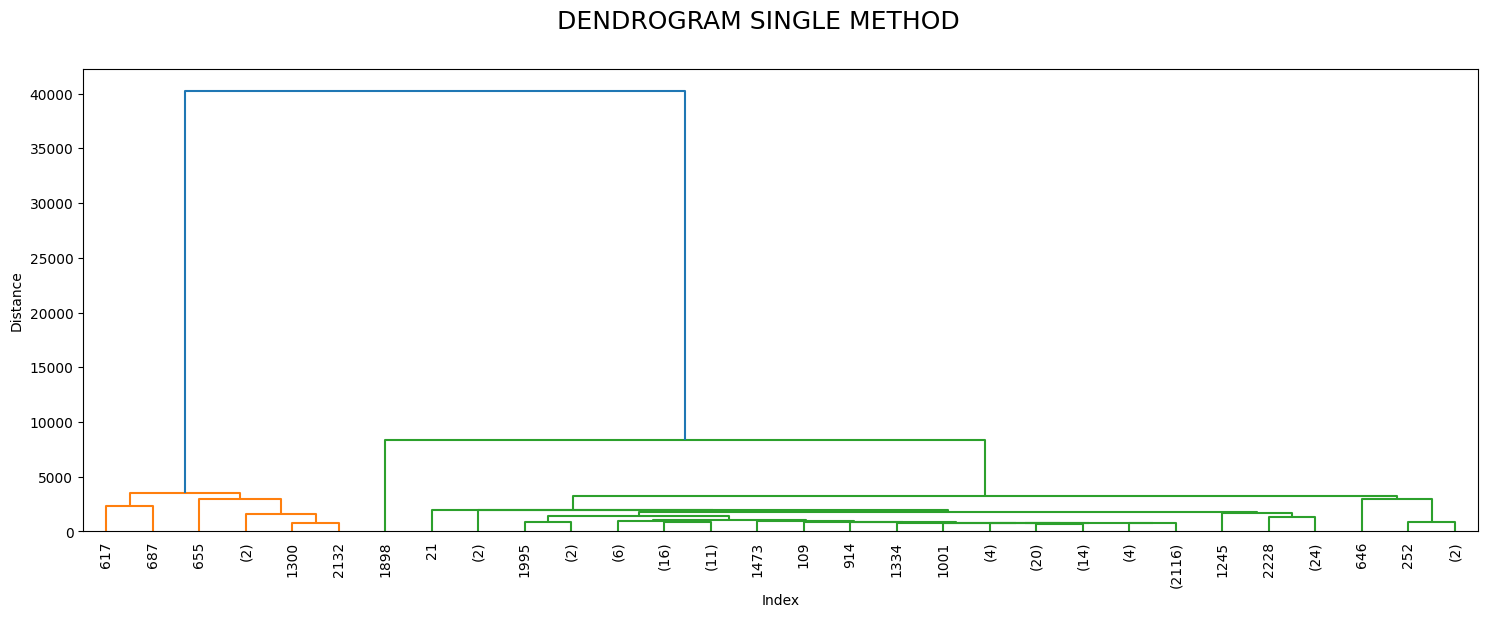

In [80]:
dist_sin = linkage(X, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [81]:
df['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
df['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

In [82]:
px.scatter_3d(df, x='Income', y='Recency',z='NumStorePurchases', color='3_clust')

Добре відокремлен кластер з високим доходом

In [83]:
s = metrics.silhouette_score(X, df['2_clust'], metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.76


**Завдання 10.**

Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

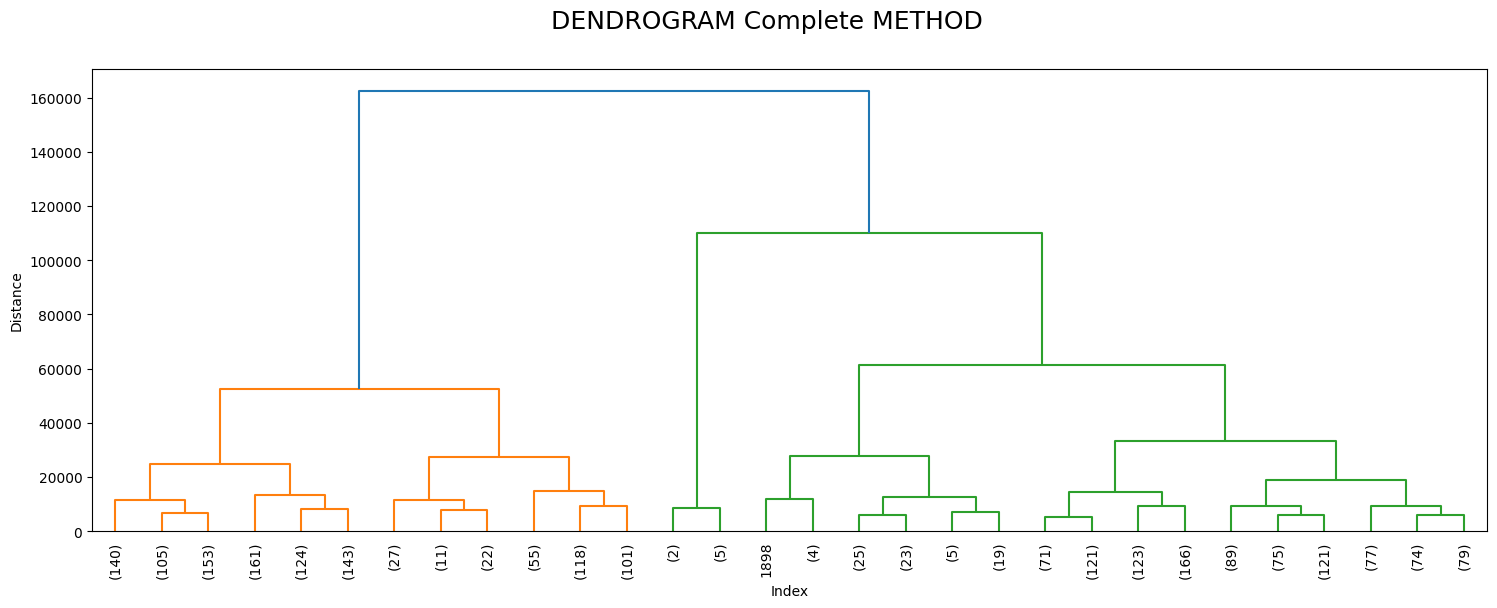

In [84]:
dist_sin = linkage(X, method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM Complete METHOD",fontsize=18)
plt.show()

In [85]:
df['2_clust_complete'] = fcluster(dist_sin, 2, criterion='maxclust')
df['3_clust_complete'] = fcluster(dist_sin, 3, criterion='maxclust')
df['5_clust_complete'] = fcluster(dist_sin, 3, criterion='maxclust')

In [86]:
px.scatter_3d(df, x='Income', y='Recency',z='NumStorePurchases', color='5_clust_complete')

In [87]:
px.scatter_3d(df, x='MntWines', y='Income',z='NumStorePurchases', color='5_clust_complete')

In [88]:
s = metrics.silhouette_score(X, df['5_clust_complete'], metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.61
